# Итоговая работа.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).


In [ ]:
def get_cos(a, b):
    len_a = np.linalg.norm(a)
    len_b = np.linalg.norm(b)
    return np.dot(a, b) / (len_a * len_b)

for i in range(len(raitings)):
    target = 0
    for j in range(len(raitings)):
        if i != j:
            cos = get_cos(raitings[i], raitings[j])
            if cos > target:
                target = cos
                user = j           
    print(i, user)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


*Или*

In [ ]:
from sklearn.metrics import pairwise_distances

for i, vector in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


In [ ]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(raitings, metric="cosine")

user_index = 0
for i in dist:
 a = list(i).index(np.min(i[np.nonzero(i)]))
 print(user_index, a)
 user_index += 1

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [ ]:
# Сжать с 15 фильмов до 5-ти признаков PCA-метод
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
new = pca.fit_transform(raitings)
new

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

*Или*

In [ ]:
# Сжать с 15 фильмов до 5-ти признаков SVD-метод
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 5)
new_ratings = svd.fit_transform(raitings)
new_ratings

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [ ]:
from sympy import diff, symbols, cos, sin, tan

x = symbols('x')
diff(tan(sin(x) + cos(2*x+3))**2)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
diff(tan(sin(x) + cos(2*x+3))**2).evalf(subs={x:1})

55.3859176353379

In [ ]:
from scipy.misc import derivative

def f(x):
    return np.tan(np.sin(x)+np.cos(2*x+3))**2

print(derivative(f, 1.0, dx=1e-6))

55.3859176464222


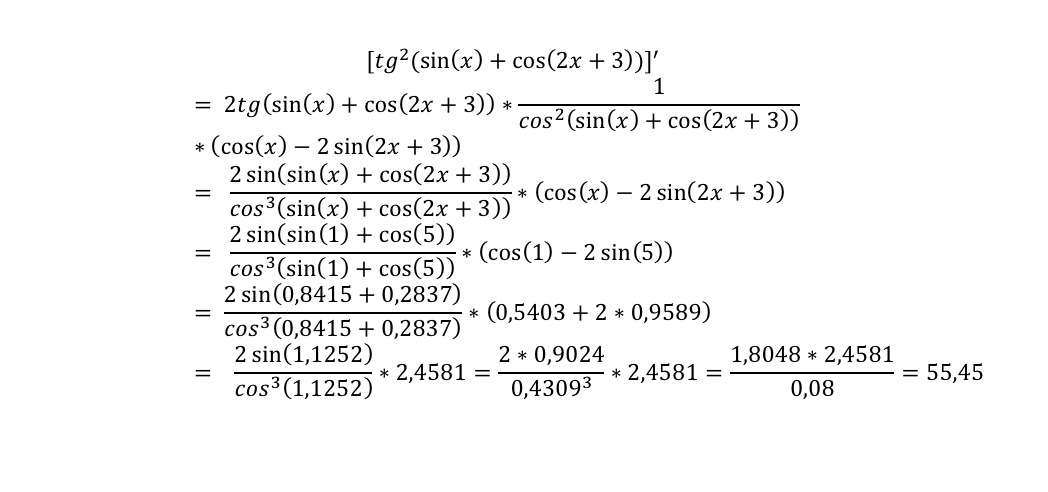

Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [ ]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

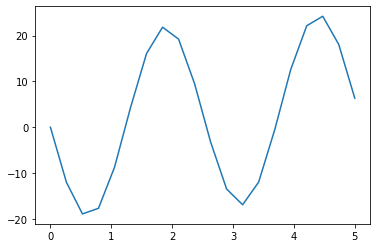

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
from scipy.optimize import minimize

res  =  minimize(error,  [0,0],  method='COBYLA')
np.around(res.x, 2)

array([ 3. , -2.5])

In [ ]:
minimize(error,  [0,0],  method='COBYLA')

     fun: 0.043631576926070004
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 152
  status: 1
 success: True
       x: array([ 3.0000271 , -2.49993557])

*Или*

In [ ]:
from scipy.optimize import differential_evolution

bounds = [(-5, 5), (-25, 25)]

result = differential_evolution(error, bounds)
result.x

array([ 3. , -2.5])

In [ ]:
differential_evolution(error, bounds)

     fun: 1.5129822541481985e-06
 message: 'Optimization terminated successfully.'
    nfev: 2193
     nit: 70
 success: True
       x: array([ 3. , -2.5])

*Бонус*

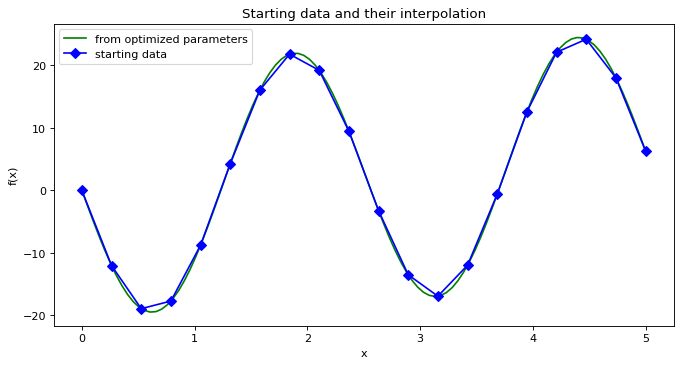

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=80)
ax = fig.add_subplot(111)
x_plot = np.linspace(0, 5, 100)
ax_1 = ax.plot(
    x_plot, f(x_plot, *res.x),
    color='green',
    label='from optimized parameters'
)
ax_2 = ax.plot(
    x, fx,
    marker='D',
    color='blue',
    label='starting data'
)
xl = ax.set_xlabel('x')
yl = ax.set_ylabel('f(x)')
l = ax.legend()
t = plt.title('Starting data and their interpolation')

Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [ ]:
from random import choices

r_var = list(range(20))

sample = np.array(choices(r_var, k=1000*50))
sample.shape = 50, 1000
means = np.mean(sample, axis=0)

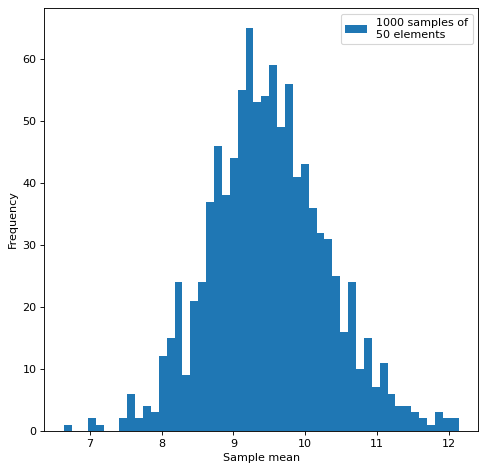

In [ ]:
fig = plt.figure(figsize=(7, 7), dpi=80)
ax = fig.add_subplot(111)
x_1 = ax.hist(means, bins=50, label='1000 samples of\n' '50 elements')
xl = ax.set_xlabel('Sample mean')
yl = ax.set_ylabel('Frequency')
l = ax.legend()

*Или*

In [ ]:
from random import randint
import matplotlib.pyplot as plt

In [ ]:
a = np.array([])
for number in range(1000):
    sample = []
    for i in range(50):
        sample.append(randint(0,20))
    sample = np.array(sample)
    a = np.append(a, sample.mean())

No handles with labels found to put in legend.


Text(0.5, 0, '$x$')

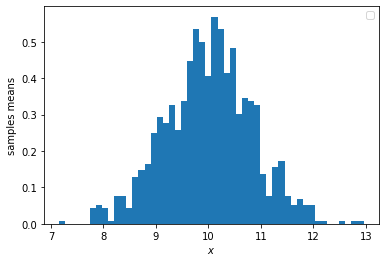

In [ ]:
plt.hist(a, density=True, bins = 50)
plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

Задание 5


Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):
```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [ ]:
from numpy import linalg

m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
w, v = linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


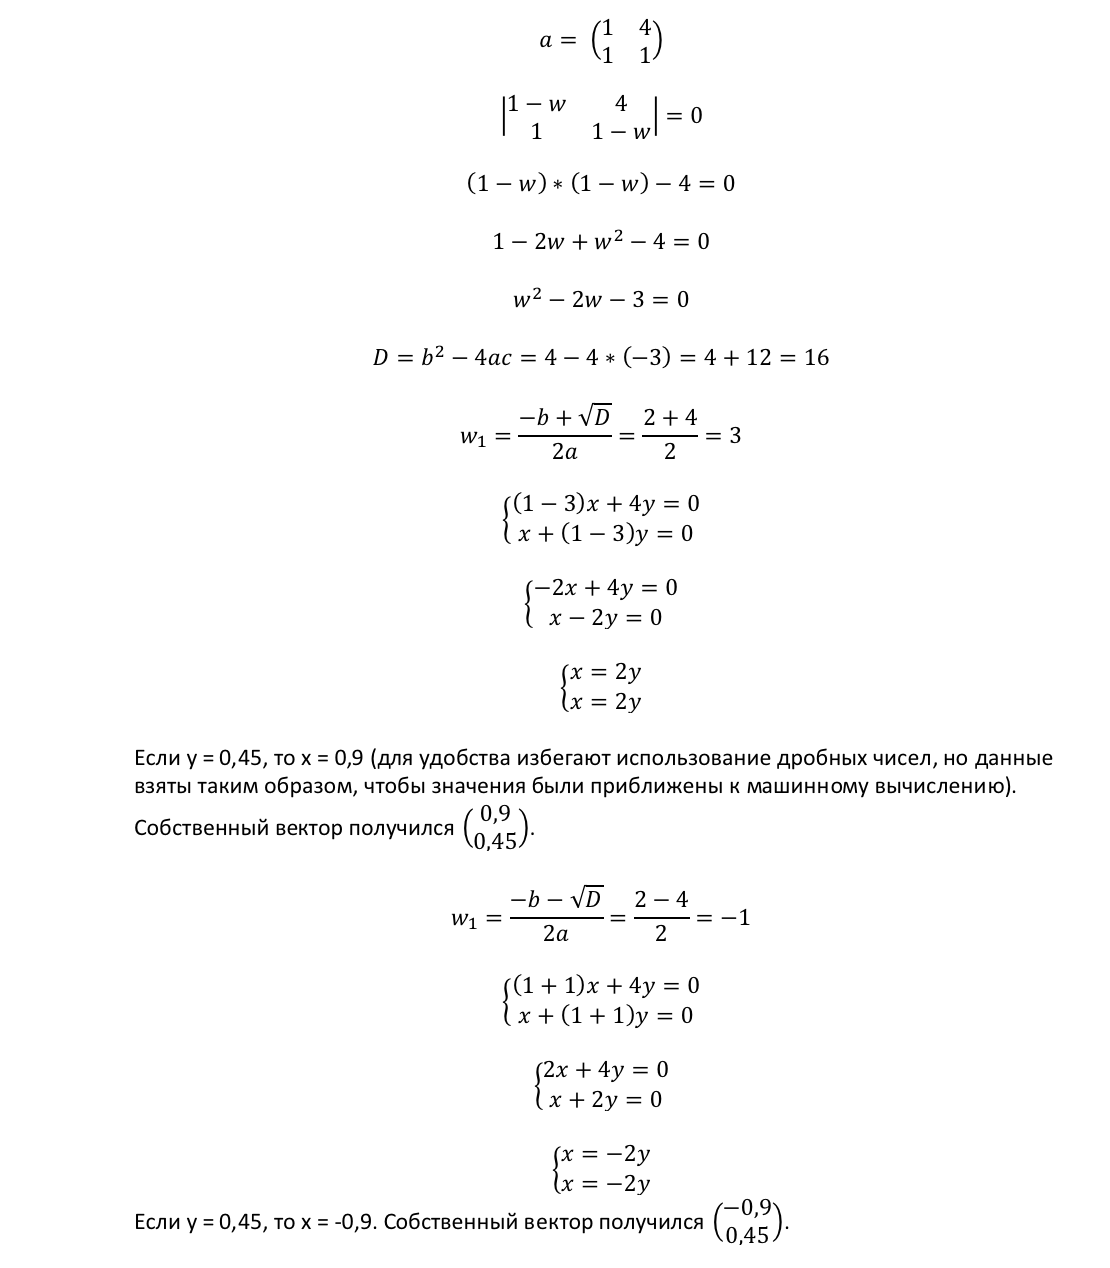